In [1]:
DATA_PATH = '../../data/'
LIGHTCURVES_PATH = DATA_PATH + 'lightcurves/'

In [2]:
import pandas as pd

Load Transient Catalog

In [5]:
filename = 'transient_catalog.pickle'
indir = DATA_PATH; filepath = indir + filename
df_cat = pd.read_pickle(filepath)
print(df_cat.TransientID.unique().shape)

(5539,)


In [6]:
df_cat.head()

,Classification,TransientID
0,Flare,1611101400424116462
1,HPM,1611101210274176502
2,HPM,1611101150154137989
3,HPM,1611091630244128695
4,CV,1611091600294129774


Load Transient Lightcurves

In [11]:
filename = 'transient_lightcurves_clean.pickle'
indir = LIGHTCURVES_PATH; filepath = indir + filename
df_lcs = pd.read_pickle(filepath)
df_lcs.head()

Mag    Magerr           MJD
ID                        observation_id                                 
TranID1409030010044114444 0               18.8765  0.166417  53766.089871
                          1               20.0519  0.281733  53990.458866
                          2               20.2199  0.295764  53996.286004
                          3               21.1192  0.495390  54385.205789
                          4               19.3289  0.195002  54355.282285

In [12]:
all_exist = True
transID_cat_list = df_cat.TransientID.unique()
for lcs_id in df_lcs.TransientID.unique():
    all_exist = all_exist and (lcs_id in transID_cat_list)
print('All exist:', str(all_exist))

AttributeError: 'DataFrame' object has no attribute 'TransientID'

Check that all Catalog TransientID's are in Lightcurves 

In [184]:
all_exist = True
lcs_missing_transientID_list = []
transID_lcs_list = df_lcs.TransientID.unique()
for cat_id in df_cat.TransientID.unique():
    id_exists = (cat_id in transID_lcs_list)
    all_exist = all_exist and id_exists
    if not id_exists: lcs_missing_transientID_list.append(cat_id)
print('All exist:', str(all_exist))
print('Missing: {} Transients'.format(len(lcs_missing_transientID_list)))

All exist: False
Missing: 555 Transients


Remove copied light curves

In [205]:
df_unique_lcs = df_lcs.copy()
for group in repeated_groups:
    df_unique_lcs = df_unique_lcs[~df_unique_lcs.TransientID.isin(group[1:])]

Merge dataframes with inner join

In [206]:
df_merge = df_cat.copy().merge(df_unique_lcs.copy().groupby('TransientID',as_index=False).count(), how='inner')
df_merge.rename(columns={'Mag':'ObsCount'}, inplace=True)
df_merge = df_merge[['TransientID', 'Classification', 'ObsCount']]

In [207]:
print(df_merge.shape)

(4869, 3)


Top 10 count of transients by class

In [209]:
df = df_merge[['Classification','ObsCount']].groupby('Classification').count()
df = df.rename(columns={'ObsCount':'ObjCount'}).sort_values('ObjCount', ascending=False)
df.head(10).transpose()

Classification,SN,CV,AGN,HPM,SN?,Blazar,Flare,Unknown,AGN?,CV?
ObjCount,1537,943,427,330,291,239,215,188,131,68


Describe transients observation count

In [210]:
df_lcs.sort_values(['MJD'])['MJD'].iloc[0]

53464.153988194696

In [211]:
df_lcs.groupby('TransientID').count().describe()

,Mag,Magerr,MJD
count,4984.000000,4984.000000,4984.000000
mean,90.584671,90.584671,90.584671
std,112.330606,112.330606,112.330606
min,1.000000,1.000000,1.000000
25%,9.000000,9.000000,9.000000
50%,35.000000,35.000000,35.000000
75%,140.000000,140.000000,140.000000
max,880.000000,880.000000,880.000000


Count number of objects with at least 5 observations

In [212]:
df_merge_filtered = df_merge[df_merge.ObsCount >= 5]
df_merge_filtered.shape[0]

4269

Top 10 count of transients by class (with at least 5 observations)

In [213]:
df = df_merge_filtered[['Classification','ObsCount']].groupby('Classification').count()
df = df.rename(columns={'ObsCount':'ObjCount'}).sort_values('ObjCount', ascending=False)
df.head(20).transpose()

Classification,SN,CV,AGN,HPM,Blazar,SN?,Flare,AGN?,Unknown,CV?,Var,Ast?,SN/CV,SN/AGN,YSO,Mira,Blazar?,Flare?,Var?,Ast
ObjCount,1293,862,425,306,237,236,207,130,114,55,47,31,28,23,21,20,19,18,12,12


Describe observation count for transients with at least 5 observations

In [214]:
df_lcs[df_lcs.TransientID.isin(df_merge_filtered.TransientID)].groupby('TransientID').count().describe()

,Mag,Magerr,MJD
count,4269.000000,4269.000000,4269.000000
mean,103.793394,103.793394,103.793394
std,115.792718,115.792718,115.792718
min,5.000000,5.000000,5.000000
25%,14.000000,14.000000,14.000000
50%,48.000000,48.000000,48.000000
75%,168.000000,168.000000,168.000000
max,880.000000,880.000000,880.000000


Count number of objects with at least 5 observations

In [215]:
df_merge_filtered = df_merge[df_merge.ObsCount >= 10]
df_merge_filtered.shape[0]

3616

Top 10 count of transients by class (with at least 10 observations)

In [216]:
df = df_merge_filtered[['Classification','ObsCount']].groupby('Classification').count()
df = df.rename(columns={'ObsCount':'ObjCount'}).sort_values('ObjCount', ascending=False)
df.head(20).transpose()

Classification,SN,CV,AGN,HPM,Blazar,Flare,SN?,AGN?,Unknown,Var,CV?,YSO,Mira,Blazar?,SN/AGN,SN/CV,LPV,Flare?,SN/AGN?,Var?
ObjCount,1049,782,424,295,232,188,134,125,65,47,39,21,20,19,18,16,11,10,9,8


Describe observation count for transients with at least 5 observations

In [217]:
df_lcs[df_lcs.TransientID.isin(df_merge_filtered.TransientID)].groupby('TransientID').count().describe()

,Mag,Magerr,MJD
count,3616.000000,3616.000000,3616.000000
mean,121.326327,121.326327,121.326327
std,117.555596,117.555596,117.555596
min,10.000000,10.000000,10.000000
25%,24.000000,24.000000,24.000000
50%,74.500000,74.500000,74.500000
75%,193.000000,193.000000,193.000000
max,880.000000,880.000000,880.000000


Visualize transient light curves

In [218]:
def lightcurve(transID):
    df_lc = df_lcs[df_lcs.TransientID == transID]
    return df_lc

In [219]:
def class_random_ids(klass):
    df_class = df_merge[df_merge.Classification == klass]
    df_class = df_class[(df_class.ObsCount <= 40) & (df_class.ObsCount >= 10)]
    IDs = df_class.TransientID.unique()
    np.random.seed(40)
    rand = np.random.randint(0, IDs.shape[0]-1, 4)
    randIds = IDs[rand]
    return randIds

In [220]:
def plot_lightcurve(lc):
    plot = lc.plot(x='MJD', y='Mag', marker='.', markeredgecolor='black', linestyle='None', legend=False, figsize=(7,7),ylim=(0,30),  yerr='Magerr', elinewidth=0.7)
    plot.set_xlabel('Modified Julian Date')
    plot.set_ylabel('Mag')

In [221]:
top_classes = ['SN', 'CV', 'AGN', 'Blazar']

for i, klass in enumerate(top_classes):
    ids = class_random_ids(klass)
    for idx in ids:
        lc = lightcurve(idx)
        plot_lightcurve(lc)
        plt.savefig('graphs/{}_{}.png'.format(klass, idx))
        plt.close()

NameError: name 'np' is not defined

Visualize correctly classified in binary task

     Classification          TransientID
3342            HPM  1111031520324144272


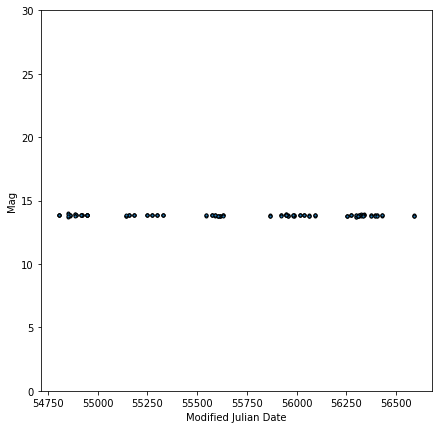

In [425]:
classified_ids = [1111031520324144272]
for ix, _ in enumerate(classified_ids):
    lc = lightcurve(classified_ids[ix])
    print(df_cat[df_cat.TransientID == classified_ids[ix]])
    plot_lightcurve(lc)
#    plt.savefig('graphs/binary/trans_corr_{}.png'.format(classified_ids[ix]))
#    plt.close()

Visualize incorrectly classified in binary task

In [422]:
missclassified_ids = [1509251350694128317, 1603021070274145695, 1404301350644109127, 1607060121174118737]
for ix, _ in enumerate(missclassified_ids):
    lc = lightcurve(missclassified_ids[ix])
    print(df_cat[df_cat.TransientID == missclassified_ids[ix]])
    plot_lightcurve(lc)
    plt.savefig('graphs/binary/trans_incorr_{}.png'.format(missclassified_ids[ix]))
    plt.close()

    Classification          TransientID
709             CV  1509251350694128317
    Classification          TransientID
365             SN  1603021070274145695
     Classification          TransientID
1449             SN  1404301350644109127
    Classification          TransientID
146           AGN?  1607060121174118737
